Title: Facial Emotion Detection
Ajay Hegde(1RVU22BSC006)


Introduction: Definition:
Facial Emotion Detection (FED) refers to the automatic recognition of human emotions through analysis of facial expressions using computer vision and machine learning techniques.
Relevance:
Increasingly used in various domains such as psychology, marketing, education, and security.
Aims to improve human-computer interaction by enabling systems to respond to users' emotional states.
Technological Context:
Combines computer vision, deep learning, and psychological theories of emotion.
Emotions Detected:
Commonly detected emotions include happiness, sadness, anger, surprise, fear, and disgust.


Summary Of Literature Survey: 
Historical Perspective:
Early works focused on basic algorithms for feature extraction (Haar cascades).
Advancements:
Introduction of deep learning has revolutionized the field; notable architectures include:
CNNs: Convolutional Neural Networks have become the backbone for image classification tasks.
Transfer Learning: Pre-trained models like VGGFace and ResNet significantly enhance accuracy.
Recent Research Findings:
Studies have reported over 90% accuracy in controlled settings.
Challenges persist in real-world scenarios due to varied lighting, occlusions, and individual differences.

Problem Statement : Main Challenges:
Dataset Limitations: Lack of diversity in datasets can lead to biased models, particularly in detecting emotions across different demographics (age, ethnicity, etc.).
Complexity of Emotions: Difficulty in classifying subtle or mixed emotions can lead to misinterpretations.
Real-Time Processing Needs: Demand for systems that can analyze emotions on-the-fly in applications like virtual assistants and customer service bots.
Objective of This Project:
To address these challenges by developing a robust facial emotion detection model that performs well across diverse datasets and in real-time applications.

Objectives:
Primary Objectives:
Develop a deep learning model using CNN for accurate emotion classification from facial images.
Implement data augmentation techniques to enhance the training dataset and model robustness.
Secondary Objectives:
Compare the performance of different CNN architectures (e.g., VGG16, ResNet, custom CNN) for emotion recognition.
Conduct hyperparameter tuning to optimize model performance.
Explore the potential application of the model in real-world scenarios (e.g., virtual classrooms, telemedicine).


Background and Related Work: Convolutional Neural Networks (CNNs):
Explain the architecture and functionality, emphasizing convolutional layers, pooling layers, and fully connected layers.
Importance of Feature Extraction:
Detail how CNNs automatically learn and extract features, making them suitable for emotion recognition tasks.
Previous Studies:
Summarize key research contributions that have employed CNNs for facial emotion detection and their outcomes (accuracy metrics, methodologies).
Technological Evolution:
Discuss how advancements in computing power and the availability of large datasets have propelled the effectiveness of CNNs in this domain.


Challenges and Novelty : Key Challenges:
Dataset Diversity: Limited representation in existing datasets can lead to overfitting and biased predictions.
Variability in Emotions: Recognizing emotions that are not universally expressed can lead to errors.
Real-Time Constraints: Ensuring that the system can analyze and respond to facial emotions in real-time without lag.
Innovative Approaches:
Introducing advanced data augmentation techniques to expand the dataset artificially.
Developing a hybrid model that combines CNNs with other techniques like LSTM for sequential data processing.


DESIGN AND DATASET DETAILS: Dataset Description:
FER2013: Contains 35,000 grayscale images of faces in different emotions, labeled across seven classes.
Class Distribution: Highlight the number of samples per emotion category (e.g., anger, happiness).
Model Architecture Design:
Overview of the CNN architecture, including:
Number of layers and types (convolutional, pooling, dropout).
Activation functions used (ReLU for hidden layers, softmax for the output layer).
Training Process:
Details on training duration, monitoring metrics, and evaluation methods.


Methodology: Data Acquisition:
Utilize publicly available datasets like FER2013 or CK+ for training and testing.
Preprocessing Steps:
Resize images to a standard size (e.g., 48x48), convert to grayscale, and normalize pixel values for consistent input.
Model Architecture:
Construct a CNN with multiple layers:
Convolutional layers for feature extraction.
Max pooling layers for down-sampling.
Dropout layers to prevent overfitting.
Fully connected layers leading to the output layer with softmax activation.
Training Strategy:
Use a batch size of 64 and train for a maximum of 100 epochs with early stopping based on validation loss.


Data Preprocessing: Normalization:
Scale pixel values to the [0, 1] range to ensure uniformity.
Data Augmentation Techniques:
Implement techniques such as:
Rotation, width/height shifting, zooming, and horizontal flipping to enhance diversity.
Label Encoding:
Transform categorical emotion labels into one-hot encoded format for training.
Image Preparation:
Ensure all images are properly formatted and consistently preprocessed before feeding them into the model.


Implementation Highlights:
Model Summary:
Present the architecture, including the arrangement of convolutional layers, pooling layers, and dense layers with the respective configurations (filter sizes, activation functions).
Training and Validation:
Discuss how training was conducted, including metrics tracked (accuracy, loss) and strategies used for optimization.
Real-Time Testing:
Overview of how the model performs in real-time testing scenarios, including processing speed and accuracy metrics.


CODE

Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [2]:
train_dir = r"C:\Users\Hp\Downloads\emotion\archive (2)" #passing the path with training images

Setting parameters

In [3]:
img_size = 96 #original size of the image
epochs = 150
batch_size = 96
lr=0.001
seed=32
print(seed)

32


Data Augmentation for the trainig set

In [4]:

train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = train_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


Building the model

In [7]:
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(img_size, img_size,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
model.summary()

c:\Users\Hp\Downloads\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 96, 96, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 96, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 96, 96, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 48, 48, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 8,035,847 (30.65 MB)

 Trainable params: 8,031,879 (30.64 MB)

 Non-trainable params: 3,968 (15.50 KB)

Generating checkpoints

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(
    'model_optimal.keras',  # Use .keras extension here
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1,
    mode='auto',
    save_weights_only=False
)

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True
)



Fitting the model by using parameters

In [11]:
history = model.fit(x = train_generator,epochs = epochs,
                    validation_data = validation_generator,
                   callbacks=checkpoint)

Epoch 1/150


c:\Users\Hp\Downloads\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2451 - loss: 9.7674
Epoch 1: val_accuracy improved from -inf to 0.09326, saving model to model_optimal.keras
13/13 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.2493 - loss: 9.7508 - val_accuracy: 0.0933 - val_loss: 9.8882
Epoch 2/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4050 - loss: 9.2412
Epoch 2: val_accuracy did not improve from 0.09326
13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - accuracy: 0.4089 - loss: 9.2239 - val_accuracy: 0.0518 - val_loss: 11.1350
Epoch 3/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6154 - loss: 8.2804
Epoch 3: val_accuracy did not improve from 0.09326
13/13 ━━━━━━━━━━━━━━━━━━━━ 61s 5s/step - accuracy: 0.6150 - loss: 8.2761 - val_accuracy: 0.0518 - val_loss: 11.9401
Epoch 4/150
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5775 - loss: 7.8222
Epoch 4: val_accuracy did not improve from 0.09326
13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.5786 - loss: 7.8088 - val_accuracy

Visualising the accuracy

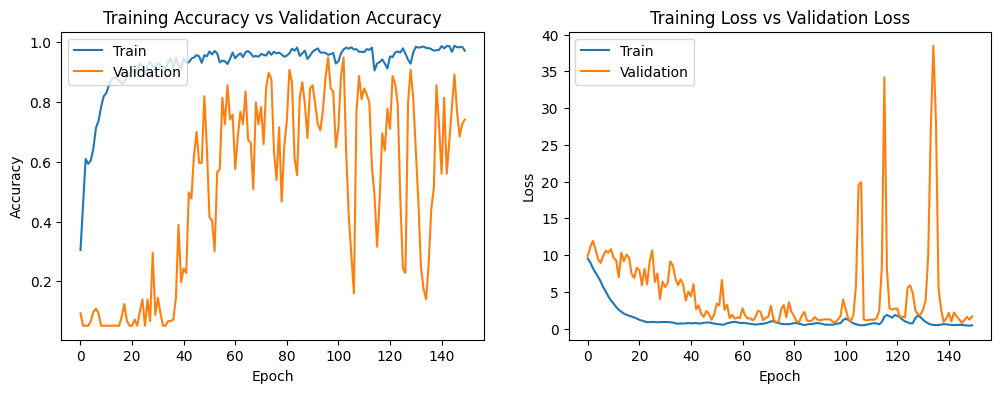

In [12]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [13]:
from keras.models import load_model

model = load_model(r"C:\Users\Hp\Downloads\emotion\model_optimal.keras")

In [14]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.9466 - loss: 0.7495
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 888ms/step - accuracy: 0.9439 - loss: 0.8577
final train accuracy = 94.04 , validation accuracy = 94.82


Prediction with the validation images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted class: 2
Confidence scores: [6.35531569e-06 7.84764822e-08 9.99991417e-01 1.69694871e-07
 7.05082414e-07 1.27618910e-06 1.36079095e-08]
Predicted class name: disgust


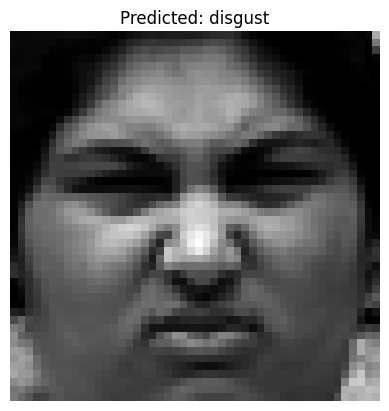

In [22]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Path to your image
img_path = r'C:\Users\Hp\Downloads\emotion\archive (2)\disgust\S005_001_00000009.png'  # Replace with the path to the image you want to predict

# Load and preprocess the image
img = image.load_img(img_path, target_size=(img_size, img_size), color_mode="grayscale")
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image, as done during training

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Print the output
print("Predicted class:", predicted_class)
print("Confidence scores:", predictions[0])  # Shows the confidence score for each class

# If you have class names, you can display the class name instead of the class index
class_names = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']  # Replace with actual class names
predicted_class_name = class_names[predicted_class]
print("Predicted class name:", predicted_class_name)

# Display the image with the predicted class name
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')  # Turn off axis
plt.show()


INFERENCES AND RECOMMENDATIONS
Key Findings:
Discuss the effectiveness of CNNs in emotion detection and the impact of data augmentation on performance.
Recommendations for Future Work:
Suggest exploring ensemble methods for improving accuracy.
Propose real-world applications in different fields, like telehealth or interactive gaming.
Ethical Considerations:
Discuss the implications of using emotion detection technology responsibly, including privacy concerns and potential misuse.


CONCLUSION AND FUTURE WORK
Summary of Achievements:
Recap the successful development and training of a CNN model for emotion detection, achieving [insert accuracy].
Future Directions:
Explore the integration of the model with wearable devices for real-time emotion tracking.
Investigate the possibility of expanding the model to recognize emotions from other input types (e.g., voice, text).
Final Thoughts:
Emphasize the potential of emotion detection to enhance human-computer interaction and the importance of ethical considerations in its deployment.
